In [ ]:
# tutorial https://www.kaggle.com/code/jutrera/training-a-densenet-for-the-stanford-car-dataset/notebook#Confussion-Matrix

# https://www.kaggle.com/datasets/ahmedsorour1/mri-for-brain-tumor-with-bounding-boxes
# https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
# https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification?select=test

#!pip install tensorflow # Installs the TensorFlow module
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
import csv

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image

from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K
from keras import metrics # Import the metrics module

In [ ]:
#tf.keras.backend.set_learning_phase(1)

img_width, img_height = 299, 299
#nb_train_samples = 1286
#nb_validation_samples = 323
epochs = 30
batch_size = 16
n_classes = 53

In [ ]:
train_data_dir = '/content/drive/My Drive/datasets/vegetables/train/'
validation_data_dir = '/content/drive/My Drive/datasets/vegetables/train/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #fill_mode = 'constant',
    #cval = 1,
    #rotation_range = 5,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


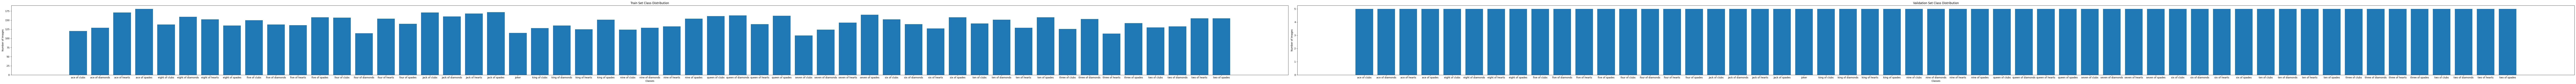

In [ ]:
# Get class counts for train_generator
train_class_counts = np.bincount(train_generator.classes)

# Get class counts for validation_generator (test_generator)
val_class_counts = np.bincount(validation_generator.classes)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(150, 5))

# Plot histogram for train_generator
axes[0].bar(class_labels, train_class_counts)
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of Images')
axes[0].set_title('Train Set Class Distribution')

# Plot histogram for validation_generator
axes[1].bar(class_labels, val_class_counts)
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Number of Images')
axes[1].set_title('Validation Set Class Distribution')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
model= tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

# Freeze the base model's layers
for layer in model.layers:
    layer.trainable = False

# Add a new classification head
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(n_classes, activation='softmax')(x) # n_classes is 6

# Create the new model
model = tf.keras.models.Model(inputs=model.input, outputs=predictions)


from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model_history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


477/477 ━━━━━━━━━━━━━━━━━━━━ 3875s 8s/step - acc: 0.0432 - loss: 4.1168 - val_acc: 0.1170 - val_loss: 3.4383
Epoch 2/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 71s 147ms/step - acc: 0.1126 - loss: 3.4722 - val_acc: 0.1472 - val_loss: 3.1360
Epoch 3/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 71s 147ms/step - acc: 0.1702 - loss: 3.0884 - val_acc: 0.1585 - val_loss: 2.9210
Epoch 4/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 70s 146ms/step - acc: 0.2144 - loss: 2.8684 - val_acc: 0.2113 - val_loss: 2.7773
Epoch 5/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 70s 146ms/step - acc: 0.2220 - loss: 2.7536 - val_acc: 0.2038 - val_loss: 2.6095
Epoch 6/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 70s 146ms/step - acc: 0.2486 - loss: 2.6141 - val_acc: 0.1962 - val_loss: 2.4927
Epoch 7/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 70s 146ms/step - acc: 0.2935 - loss: 2.4067 - val_acc: 0.3057 - val_loss: 2.3696
Epoch 8/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 70s 146ms/step - acc: 0.3072 - loss: 2.3295 - val_acc: 0.2830 - val_loss: 2.3253
Epoch 9/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 70s 

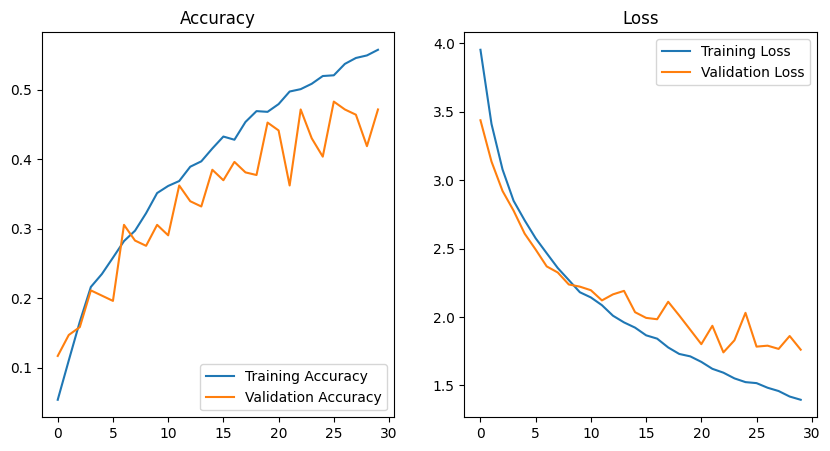

Validation Loss: 1.7608851194381714
Validation Accuracy: 0.4716981053352356
Min Validation Loss: 1.74114191532135
Max Validation Accuracy: 0.4830188751220703


In [ ]:
#visualize training results

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(epochs)

plt_size = 10

plt.figure(figsize=(plt_size, plt_size/2))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# evaluate the accuracy
score = model.evaluate(validation_generator, verbose=0)
print("Validation Loss: " + str(score[0]))
print("Validation Accuracy: " + str(score[1]))

print("Min Validation Loss: " + str(min(val_loss)))
print("Max Validation Accuracy: " + str(max(val_acc)))

In [ ]:
# visualize the confusion matrix
import numpy as np

model.evaluate(validation_generator, steps=None)#, max_queue_size=10, workers=1, use_multiprocessing=False)

pred = model.predict(validation_generator, steps=None)#, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
predicted = np.argmax(pred, axis=1)

from sklearn.metrics import confusion_matrix

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

#show results
print('Confusion Matrix')
confusion = confusion_matrix(validation_generator.classes, predicted)
plt.figure(figsize = (110,110))
sn.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels) # font size
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - acc: 0.5319 - loss: 1.5285
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 680ms/step
Confusion Matrix


In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report

# Calculate precision and recall for each class
precision_per_class = precision_score(validation_generator.classes, predicted, average=None)
recall_per_class = recall_score(validation_generator.classes, predicted, average=None)

# Display precision and recall for each class
for i, class_label in enumerate(class_labels):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]:.2f}")
    print(f"Recall: {recall_per_class[i]:.2f}")
    print("------------")

# Calculate and display overall precision and recall
overall_precision = precision_score(validation_generator.classes, predicted, average='weighted')
overall_recall = recall_score(validation_generator.classes, predicted, average='weighted')

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)

# Generate a classification report
classification_rep = classification_report(validation_generator.classes, predicted, target_names=class_labels)
print("Classification Report:\n", classification_rep)

Class: ace of clubs
Precision: 0.33
Recall: 0.80
------------
Class: ace of diamonds
Precision: 1.00
Recall: 0.80
------------
Class: ace of hearts
Precision: 0.56
Recall: 1.00
------------
Class: ace of spades
Precision: 0.75
Recall: 0.60
------------
Class: eight of clubs
Precision: 0.23
Recall: 0.60
------------
Class: eight of diamonds
Precision: 0.43
Recall: 0.60
------------
Class: eight of hearts
Precision: 1.00
Recall: 0.60
------------
Class: eight of spades
Precision: 0.00
Recall: 0.00
------------
Class: five of clubs
Precision: 0.60
Recall: 0.60
------------
Class: five of diamonds
Precision: 0.33
Recall: 0.60
------------
Class: five of hearts
Precision: 0.00
Recall: 0.00
------------
Class: five of spades
Precision: 0.67
Recall: 0.40
------------
Class: four of clubs
Precision: 0.00
Recall: 0.00
------------
Class: four of diamonds
Precision: 1.00
Recall: 0.20
------------
Class: four of hearts
Precision: 1.00
Recall: 0.20
------------
Class: four of spades
Precision: 1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m